In [28]:
import os
os.getcwd()


'/content'

In [29]:
import os

os.makedirs("data/cleaned", exist_ok=True)


# Task 2: Data Cleaning & Missing Value Handling

## Objective
The objective of this task is to clean real-world datasets by identifying and handling missing values.
This task helps in improving data quality and preparing the dataset for further analysis or machine learning models.

## Tools Used
- Python
- Pandas
- NumPy
- Matplotlib

## Datasets Used
- House Prices Dataset
- Medical Appointment No Shows Dataset


🟦 2. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


🟦3. Load the Datasets
## Loading the Dataset
The datasets are loaded using Pandas. Initial inspection is done to understand the structure,
data types, and number of records.
bold text

In [3]:
house_df = pd.read_csv("/content/house_prices.csv")
medical_df = pd.read_csv("/content/medical_appointments.csv")


===============================
🏠 HOUSE PRICES DATASET
===============================

🔹 3. Identify Missing Values

In [4]:
house_df.isnull().sum().sort_values(ascending=False)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [5]:
house_df.isnull().sum().sum()


np.int64(7829)

🔹 4. Visualize Missing Values

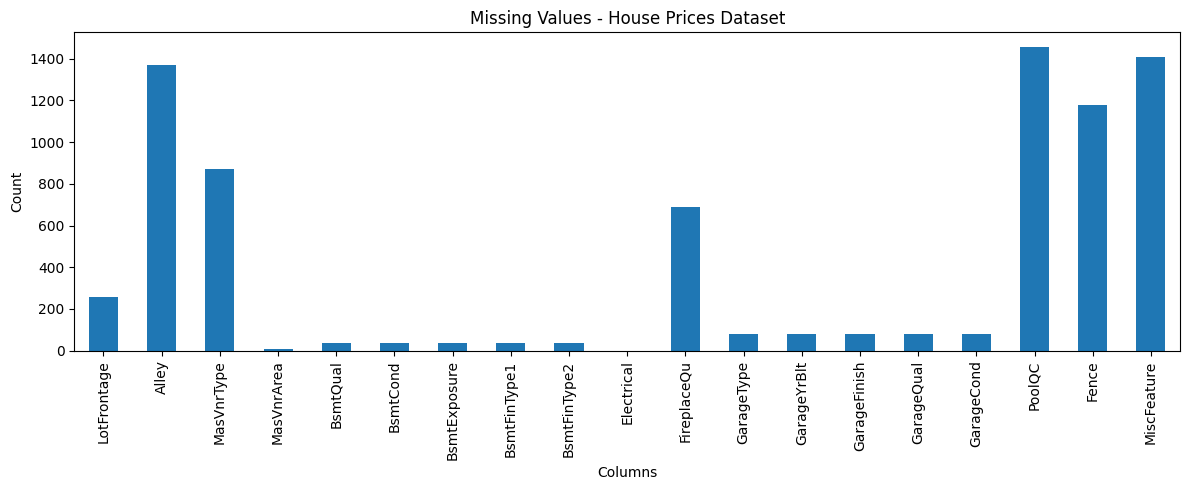

In [6]:
missing_house = house_df.isnull().sum()
missing_house = missing_house[missing_house > 0]

plt.figure(figsize=(12,5))
missing_house.plot(kind='bar')
plt.title("Missing Values - House Prices Dataset")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


🔹 5. Separate Numerical & Categorical Columns

In [7]:
house_num_cols = house_df.select_dtypes(include=['int64','float64']).columns
house_cat_cols = house_df.select_dtypes(include=['object']).columns


🔹 6. Handle Missing Values

***Numerical → Median Imputation***

In [8]:
for col in house_num_cols:
    if house_df[col].isnull().sum() > 0:
        house_df[col].fillna(house_df[col].median(), inplace=True)


/tmp/ipython-input-3702437542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df[col].fillna(house_df[col].median(), inplace=True)


***Categorical → Mode Imputation***

In [9]:
for col in house_cat_cols:
    if house_df[col].isnull().sum() > 0:
        house_df[col].fillna(house_df[col].mode()[0], inplace=True)


/tmp/ipython-input-144401150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df[col].fillna(house_df[col].mode()[0], inplace=True)


🔹 7. Remove Columns with High Missing Values

In [10]:
threshold_house = 0.4 * len(house_df)
house_df = house_df.dropna(thresh=threshold_house, axis=1)


🔹 8. Validate After Cleaning

In [11]:
house_df.isnull().sum().sum()


np.int64(0)

In [12]:
house_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

🔹 9. Save Cleaned House Prices Dataset

In [14]:
import os

os.makedirs("../data/cleaned", exist_ok=True)


In [15]:
house_df.to_csv("../data/cleaned/house_prices_cleaned.csv", index=False)


===============================
🏥 MEDICAL APPOINTMENT NO SHOWS
===============================

🔹 10. Identify Missing Values

In [16]:
medical_df.isnull().sum()


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [17]:
medical_df.isnull().sum().sum()


np.int64(0)

🔹 11. Visualize Missing Values

In [19]:
missing_medical = medical_df.isnull().sum()
missing_medical = missing_medical[missing_medical > 0]

if len(missing_medical) > 0:
    plt.figure(figsize=(8,4))
    missing_medical.plot(kind='bar')
    plt.title("Missing Values - Medical Appointment Dataset")
    plt.xlabel("Columns")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the Medical Appointment dataset.")


No missing values found in the Medical Appointment dataset.


🔹 12. Separate Numerical & Categorical Columns

In [20]:
medical_num_cols = medical_df.select_dtypes(include=['int64','float64']).columns
medical_cat_cols = medical_df.select_dtypes(include=['object']).columns


🔹 13. Handle Missing Values

***Numerical → Median Imputation***

In [21]:
for col in medical_num_cols:
    if medical_df[col].isnull().sum() > 0:
        medical_df[col].fillna(medical_df[col].median(), inplace=True)


***Categorical → Mode Imputation***

In [22]:
for col in medical_cat_cols:
    if medical_df[col].isnull().sum() > 0:
        medical_df[col].fillna(medical_df[col].mode()[0], inplace=True)


🔹 14. Remove Columns with High Missing Values

In [23]:
threshold_medical = 0.4 * len(medical_df)
medical_df = medical_df.dropna(thresh=threshold_medical, axis=1)


🔹 15. Validate After Cleaning

In [24]:
medical_df.isnull().sum().sum()


np.int64(0)

In [25]:
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


🔹 16. Save Cleaned Medical Dataset

In [26]:
import os
os.makedirs("../data/cleaned", exist_ok=True)

medical_df.to_csv("../data/cleaned/medical_appointments_cleaned.csv", index=False)


### Medical Appointment Dataset – Summary

The Medical Appointment No Shows dataset did not contain any missing values.
Hence, no imputation or column removal was required.
The dataset was validated and saved as part of the data cleaning workflow.
